# machine learning assignment with adult data

#### by Ansgar Lichter, Fabian Hupe & Jonas Mitschke

## INPUT

In [213]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as py
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier

In [214]:
df = pd.read_csv(filepath_or_buffer='adult-data.txt', header=None)

In [215]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Class']

df.columns = column_names
df.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [216]:
len(df)

32561

## PREPARATION

### remove '?' in data (4.262 occurances)

In [217]:
missing_value = "?"
df = df[~(df.astype(str) == ' ?').any(1)]
df.shape

(30162, 15)

len(d1)
df.dtypes

### Summarize class distribution

In [218]:
target = df.values[:,-1]
counter = Counter(target)
for i,j in counter.items():
	per = j / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (i, j, per))

Class= <=50K, Count=22654, Percentage=75.108%
Class= >50K, Count=7508, Percentage=24.892%


### Visualize distribution of each numerical input variable by histograms

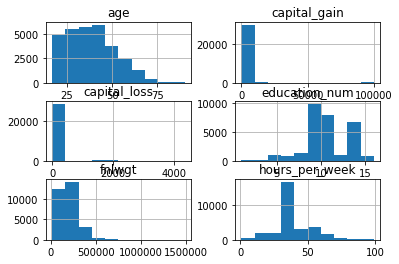

In [219]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
subset = df[numeric_columns]
subset.hist()
py.show()

TODO: Add explanation of histograms

## TRAINING

### C4.5, naive Bayes, nearest neighbor

In [220]:
y = np.asarray(df.loc[:, 'Class'])
X = np.asarray(df.iloc[:, :-1])

## EVALUATION

In [221]:
## Define baseline model for evaluation

In [222]:
baseline_model = DummyClassifier(strategy="most_frequent")
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(baseline_model, X, y, scoring="accuracy", cv=cv, n_jobs=1)
print("Mean Accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.751 (0.000)


We have now a baseline model to evaluate the performance of the other models. If a model has an accuracy >= 75,2% it has skill. Otherwise the models are not suited for the census income dataset.